In [2]:
print('hello world!')

hello world!


In [5]:
#importing packages 
import numpy as np
import pandas as pd

In [49]:
#reading data set
df = pd.read_csv(r'C:\Users\killi\Downloads\HSA06.20221122T131126.csv')

In [50]:
#inspecting data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  588 non-null    object 
 1   Year             588 non-null    int64  
 2   Area             588 non-null    object 
 3   UNIT             588 non-null    object 
 4   VALUE            583 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.1+ KB
None


In [51]:
#counting missing values
print(df.isnull().sum())


Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              5
dtype: int64


In [52]:
#replace missing values and check
print(df.fillna(0).isnull().sum())

Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              0
dtype: int64


In [53]:
#checking how many rows and columns are in the dataset
df.shape

(588, 5)

In [55]:
#create 2 datasets for new price analysis. One for Dublin and the second for National.
df_Dub_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="National")].reset_index()

In [56]:
df_Dub_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,1,New House Prices,1975,Dublin,Euro,13137.0
1,8,New House Prices,1976,Dublin,Euro,15342.0
2,15,New House Prices,1977,Dublin,Euro,19055.0
3,22,New House Prices,1978,Dublin,Euro,25745.0
4,29,New House Prices,1979,Dublin,Euro,32005.0


In [57]:
df_Nat_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,0,New House Prices,1975,National,Euro,13254.0
1,7,New House Prices,1976,National,Euro,15564.0
2,14,New House Prices,1977,National,Euro,18754.0
3,21,New House Prices,1978,National,Euro,24082.0
4,28,New House Prices,1979,National,Euro,29387.0


In [58]:
#import matplotlib to display graphs
import matplotlib.pyplot as plt

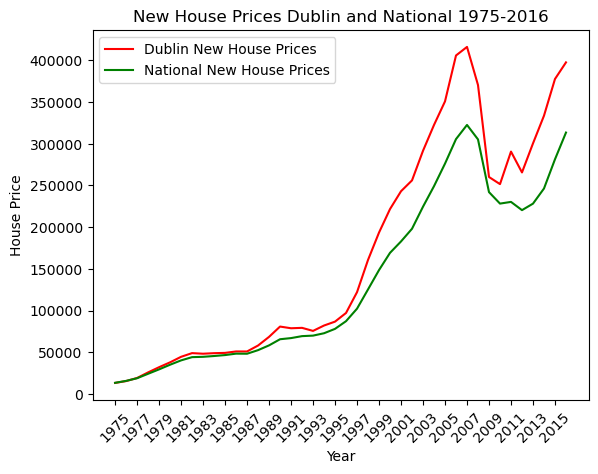

In [60]:
#plotting price of 2 new datasets
plt.plot(df_Dub_new['Year'], df_Dub_new['VALUE'], color='r', label='Dublin New House Prices')
plt.plot(df_Nat_new['Year'], df_Nat_new['VALUE'], color='g', label='National New House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("New House Prices Dublin and National 1975-2016")


plt.legend()
plt.xticks(list(df_Dub_new['Year'].unique()[::2]), rotation=45)
plt.show()


In [62]:
#create 2 datasets for secondhand price analysis. One for Dublin and the second for National.
df_Dub_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="National")].reset_index()

In [63]:
df_Dub_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,295,Second Hand House Prices,1975,Dublin,Euro,12774.0
1,302,Second Hand House Prices,1976,Dublin,Euro,15850.0
2,309,Second Hand House Prices,1977,Dublin,Euro,18778.0
3,316,Second Hand House Prices,1978,Dublin,Euro,22920.0
4,323,Second Hand House Prices,1979,Dublin,Euro,30092.0


In [64]:
df_Nat_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,294,Second Hand House Prices,1975,National,Euro,12478.0
1,301,Second Hand House Prices,1976,National,Euro,15303.0
2,308,Second Hand House Prices,1977,National,Euro,17925.0
3,315,Second Hand House Prices,1978,National,Euro,21895.0
4,322,Second Hand House Prices,1979,National,Euro,27598.0


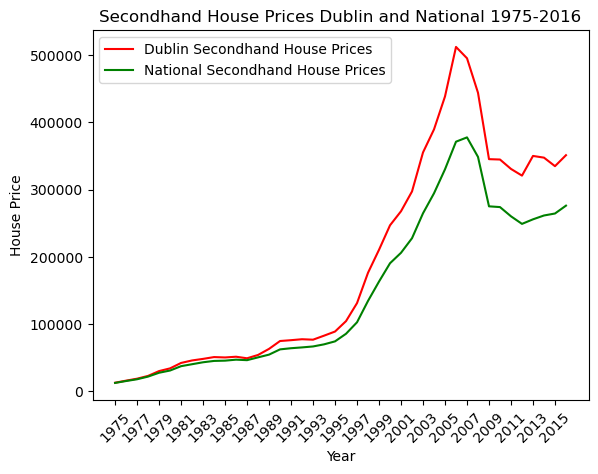

In [66]:
#plotting price of 2 new datasets
plt.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
plt.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("Secondhand House Prices Dublin and National 1975-2016")
plt.xticks(list(df_Dub_second['Year'].unique()[::2]), rotation=45)

plt.legend()
plt.show()

In [67]:
# check new house price correlation
df_Dub_new['VALUE'].corr(df_Nat_new['VALUE'], method='pearson')

0.9957710223924618

In [68]:
# check secondhand price correlation
df_Dub_second['VALUE'].corr(df_Nat_second['VALUE'], method='pearson')

0.9989860995914884

In [69]:
#The graphs show that new and second hand house prices are strongly correlated.
#To measure the actual correlation we can use thePearson correlation measure. 
#This measures the strength of the linear relationship between two variables

In [81]:
#I will examine more data and plot it beside both of these graphs 
#importing csv file 'House Construction Cost Index'
df2 = pd.read_csv(r'C:\Users\killi\Downloads\HSA09.20221123T171128.csv')

In [82]:
#look at shape of dataframe 2 ('House Construction Cost Index')
df2.shape

(42, 5)

In [83]:
df2.head()

,STATISTIC Label,Year,State,UNIT,VALUE
0,House Construction Cost Index,1975,State,Base Jan 1991=100,20.0
1,House Construction Cost Index,1976,State,Base Jan 1991=100,22.9
2,House Construction Cost Index,1977,State,Base Jan 1991=100,26.9
3,House Construction Cost Index,1978,State,Base Jan 1991=100,29.6
4,House Construction Cost Index,1979,State,Base Jan 1991=100,34.2


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  513 non-null    object 
 1   Month            513 non-null    object 
 2   State            513 non-null    object 
 3   UNIT             513 non-null    object 
 4   VALUE            513 non-null    float64
dtypes: float64(1), object(4)
memory usage: 20.2+ KB


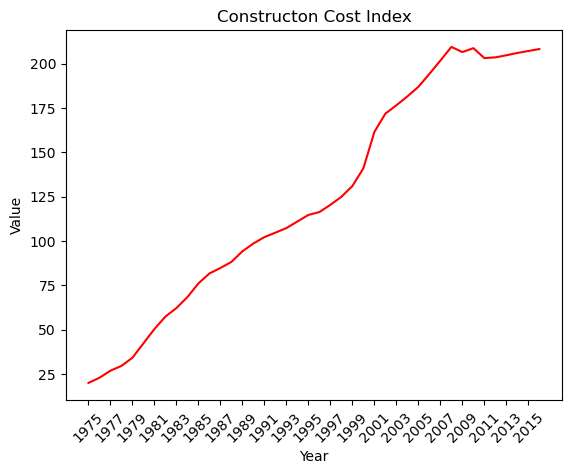

In [86]:
#plotting this
plt.plot(df2['Year'], df2['VALUE'], color='r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Constructon Cost Index")
plt.xticks(list(df2['Year'].unique()[::2]), rotation=45)

plt.show()

In [283]:
#going to scrape inflation data from internet
import requests
import time
from bs4 import BeautifulSoup

In [284]:
world_data = 'https://www.worlddata.info/europe/ireland/inflation-rates.php#:~:text=During%20the%20observation%20period%20from,year%20inflation%20rate%20was%208.2%25.'

In [285]:
page = requests.get(world_data)

In [286]:
soup = BeautifulSoup(page.text, 'lxml')

In [109]:
#i got the html, now I will get the table im looking for

In [287]:
table = soup.find('table', {'class' : "std100 hover"})

In [288]:
headers = []

In [289]:
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)


In [290]:
inflation = pd.DataFrame(columns = headers)

In [291]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(inflation)
    inflation.loc[length] = row_data
    

In [292]:
print(inflation)

    Year  Ireland    Ø EU   Ø USA Ø World
0   2021   2.36 %  2.55 %  4.70 %  3.42 %
1   2020  -0.33 %  0.50 %  1.23 %  1.92 %
2   2019   0.94 %  1.63 %  1.81 %  2.19 %
3   2018   0.49 %  1.74 %  2.44 %  2.44 %
4   2017   0.34 %  1.43 %  2.13 %  2.19 %
..   ...      ...     ...     ...     ...
57  1964   6.72 %  3.42 %  1.28 %     n/a
58  1963   2.45 %  2.92 %  1.24 %     n/a
59  1962   4.26 %  3.55 %  1.20 %     n/a
60  1961   2.76 %  2.08 %  1.07 %     n/a
61  1960   0.45 %  1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [293]:
inflation['Ireland'] = [x.strip('%') for x in inflation['Ireland']]

In [295]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     62 non-null     object
 1   Ireland  62 non-null     object
 2   Ø EU     62 non-null     object
 3   Ø USA    62 non-null     object
 4   Ø World  62 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [294]:
print(inflation)



    Year Ireland    Ø EU   Ø USA Ø World
0   2021   2.36   2.55 %  4.70 %  3.42 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
4   2017   0.34   1.43 %  2.13 %  2.19 %
..   ...     ...     ...     ...     ...
57  1964   6.72   3.42 %  1.28 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
61  1960   0.45   1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [296]:
inflation = inflation[::-1]
print(inflation)

    Year Ireland    Ø EU   Ø USA Ø World
61  1960   0.45   1.74 %  1.46 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
57  1964   6.72   3.42 %  1.28 %     n/a
..   ...     ...     ...     ...     ...
4   2017   0.34   1.43 %  2.13 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
0   2021   2.36   2.55 %  4.70 %  3.42 %

[62 rows x 5 columns]


In [298]:
inflation["Ireland"] = inflation.Ireland.astype(float)
inflation["Year"] = inflation.Year.astype(float)

In [299]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 61 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     62 non-null     float64
 1   Ireland  62 non-null     float64
 2   Ø EU     62 non-null     object 
 3   Ø USA    62 non-null     object 
 4   Ø World  62 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.9+ KB


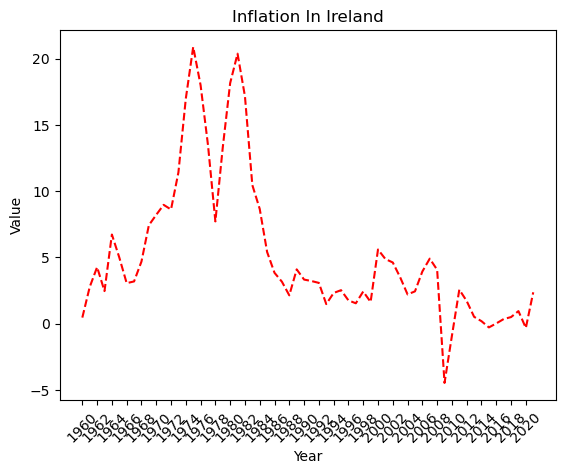

In [300]:
plt.plot(inflation['Year'], inflation['Ireland'], color='r', linestyle="--")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Inflation In Ireland")
plt.xticks(list(inflation['Year'].unique()[::2]), rotation=45)
plt.show()